# Objectives

1. What is Linear Regression ?
2. What is Loss Function for LR ? 
3. How is LR solved ? 
4. Goodness of fit 
5. LR implementation in scikit-learn

# Warm up

Do the Anscombe's Quartet Warm up exercise from the [course notes](https://krspiced.pythonanywhere.com/chapters/project_bicycles/linear_regression/README.html)

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

df = sns.load_dataset("anscombe")

In [2]:
df.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


In [3]:
df['dataset'].value_counts()

I      11
II     11
III    11
IV     11
Name: dataset, dtype: int64

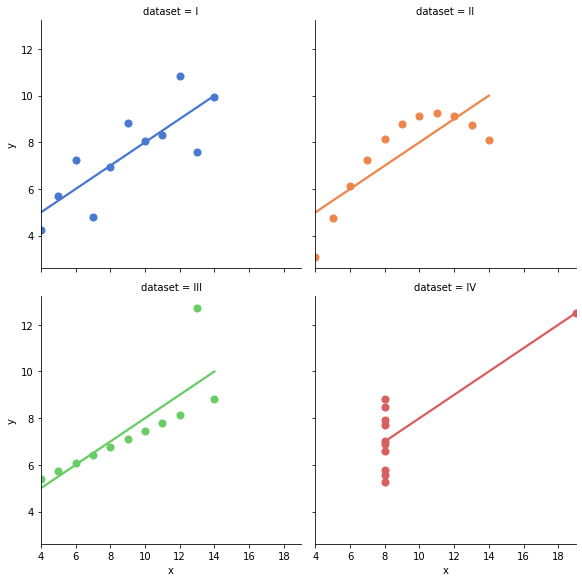

In [4]:
# Show the results of a linear regression within each dataset
sns.lmplot(x="x", y="y", col="dataset", hue="dataset", data=df,
           col_wrap=2, ci=None, palette="muted", height=4,
           scatter_kws={"s": 50, "alpha": 1}) ;

## 1. Linear Regression

* Regression: predicting a continuous value, not a class
* Linear: fitting a line through our data! 

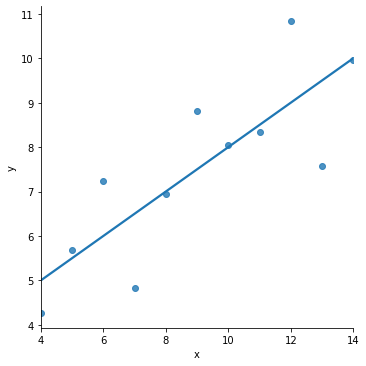

In [5]:
sns.lmplot(data=df.loc[df['dataset']=='I'], x='x', y='y', ci=None);

### Ingredients for Linear Regression

### 1.1 Model Equation

**A LR model is a linear function that is fitted to the data**   
single feature/predictor ===>
$$ y = w_1 x + w_0 $$ 

multiple features/predictors ===>
$$ y = w_1 x_1 + w_2 x_2 + ... + w_n x_n + w_0 $$ 

### 1.2 Loss Function

**The loss function helps us evaluate how our LR model is doing**

$$ MSE = \frac{1}{N}\sum((y_{pred_i}-y_{true_i})^2) $$ 

Root Mean Square Error, is going to have the same unit as my y

### Q: What is our target here ? What should the training process attempt to achieve in terms of MSE ?

### 1.3 Optimization Algorithm

**Our aim in training/fitting a LR model is to get the best model possible**
**The best model possible will have the lowest MSE possible for our data**
**This is done using one of these two options:**
    
- Analytical method: **Normal Equation**
            * Will get us the global minimum of MSE, i.e. best model possible
            * slow and expensive to calculate 
- Numerical: **Gradient Descent**
            * calculates loss function gradient, updates weights moving in direction of a better loss function
            * more on this tomorrow in Gradient Descent encounter
            * significantly faster than analytical approach
            * might not get us the best possible model, but will give us something close to it

In [19]:
# Create random datapoints
x = np.random.uniform(low=0, high=100, size=200)
noise = np.random.normal(loc=0, scale=30, size=200)
w1 = 1.5
w0 = 2.5

In [22]:
x

array([36.81868514, 45.96813093, 19.01114424, 54.73933352, 86.16387207,
       37.49177476, 76.54546837, 95.11487485, 87.91220135, 13.32337209,
       57.92573165, 40.98195108, 89.57108271, 21.06843554,  8.75476711,
       21.27440183,  4.72681667, 36.20771785, 84.07472085, 29.58314691,
       53.03159769, 64.49860578, 56.8712808 , 90.98053621, 16.01120554,
        8.9061415 , 69.77444499, 32.13928131, 30.17425914,  6.14105132,
       11.59506668, 79.78685238, 95.38010165, 77.87400844, 58.20068774,
       18.15756565, 75.88389442, 31.79357219, 88.18253425, 45.79850296,
       15.56354765, 15.71630535, 97.24403191, 68.30006105, 22.3573711 ,
        3.08504419, 36.00389432, 94.23932078, 89.94490465, 79.20313357,
       86.88455906, 81.32200336, 85.16171156, 81.88070508, 69.0075765 ,
       15.26931276, 77.97259557, 90.6248811 , 29.64142228, 35.3723058 ,
       43.11981169, 51.5173637 , 70.50993056, 45.15082376, 25.49858735,
        7.79211624, 50.20365931, 48.43539437, 59.73800046, 12.94

In [20]:
y = w1*x + w0 + noise

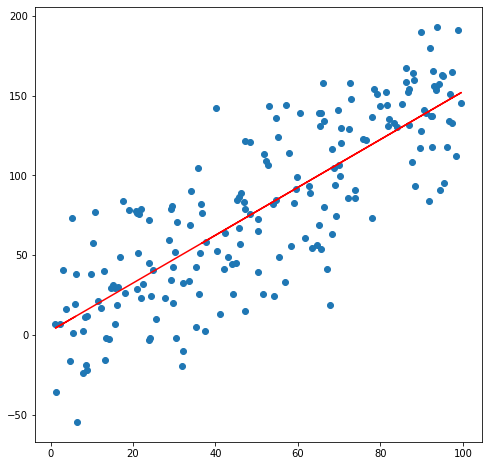

In [21]:
fig, ax = plt.subplots(figsize=(8,8))

ax.scatter(x, y);
ax.plot(x, w1*x+w0, c='r');

## LR implementation in scikit-learn

In [9]:
m = LinearRegression()  # instantiate model

In [23]:
X = pd.DataFrame(x)   # define feature dataframe

In [24]:
X.head()

,0
0,36.818685
1,45.968131
2,19.011144
3,54.739334
4,86.163872


In [25]:
x.shape, X.shape

((200,), (200, 1))

In [26]:
m.fit(X, y)

LinearRegression()

In [27]:
m.coef_, m.intercept_

(array([1.538614]), 0.5308140672877073)

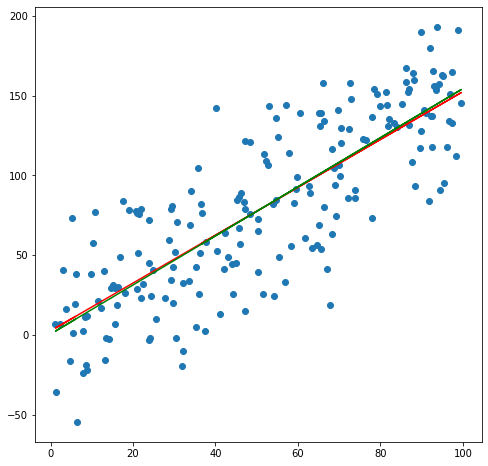

In [28]:
fig, ax = plt.subplots(figsize=(8,8))


ax.scatter(x, y)
ax.plot(x, w1*x+w0, c='r');
ax.plot(x, m.coef_[0]*x+m.intercept_, c='g');

## 3. Goodness of Fit

X = ...
y = ...
X_train, X_test, y_train, y_test = train_test_split(...)

m = LinearRegression()
m.fit(X_train, y_train)
m.score(X_train, y_train) # score on the training data
m.score(X_test, y_test) # score on the testing data

Score you get from `m.score()` for linear regression is R$^2$. 
* It tells you how much variance in your data is explained by your model — high R$^2$ is good, because then most most of the variance in your data is explained by your model. 
* It tells you how much better your model is than predicting average $y$ — if your R$^2$ is 0 then your model is no better than predicting an average value of $y$ 

###  Kaggle scorer: RMSLE

In [ ]:
from sklearn.metrics import mean_squared_log_error
y_pred = m.predict(X_test)
kaggle_score = np.sqrt(mean_square_log_error(y_true=y, y_pred=y_pred))

### What to do till the end of the day

1. Explore bike sharing dataset
2. Create plots (EDA)
3. If you have time, check the Anscombe dataset and use it to fit LR models for each of the 4 categories